# Tectonic and Landscape Evolution_Natural landscape

In [1]:
# version: CH_240804_copy

In [1]:
#importing necessary components
import numpy as np
from landlab import RasterModelGrid, imshow_grid, imshow_grid_at_node
from landlab.components import SinkFillerBarnes, FlowAccumulator, StreamPowerEroder, SteepnessFinder, ChiFinder, ChannelProfiler
from landlab.io import write_esri_ascii
from landlab.utils import get_watershed_masks
import matplotlib as plt
from bmi_topography import Topography
import rasterio
from rasterio.transform import from_origin
import matplotlib.pyplot as plt

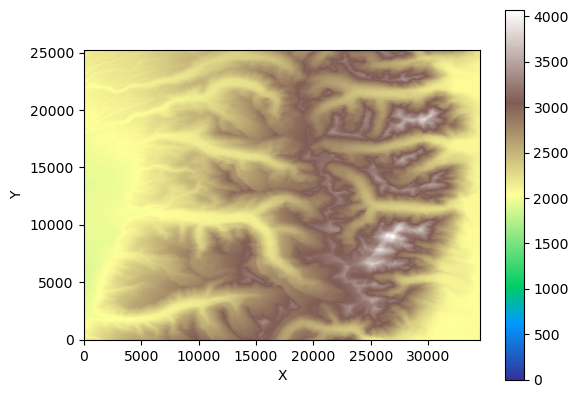

In [2]:
# importing DEM using lat,long from OpenTopo website
the_grand_teton = Topography(north=43.891224, #44.247929,
                             south=43.657248, #43.855, #44.019297,
                             east=-110.731375, #-110.438699,
                             west=-111.051308, #110.935236,
                             output_format="GTiff",
                             dem_type="SRTMGL1",
                             api_key='d15c3831a8ac439bb9337099b91498e0')

the_grand_teton_DEM = the_grand_teton.load()
z = np.flipud(the_grand_teton_DEM.values.squeeze())

grid = RasterModelGrid(z.shape, xy_spacing=(30, 30)) #come back to this bit
grid.at_node["topographic__elevation"] = z/1000*1000

# Show the grid we have
grid.imshow("topographic__elevation", cmap="terrain", vmin=0)

In [3]:
# Fill sinks
sfb = SinkFillerBarnes(grid,method="Steepest")
sfb.run_one_step()

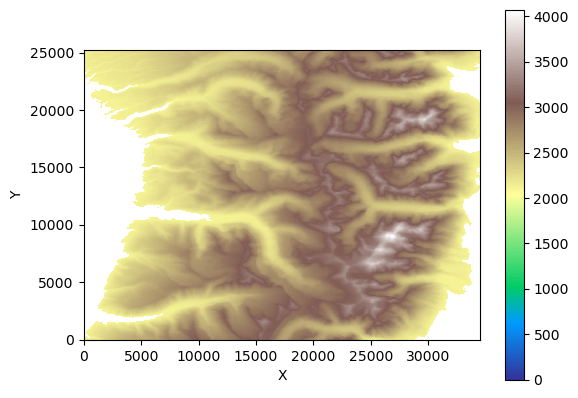

In [4]:
# Mask the grid nodes with the elevation less than 2100 m to set the base level elevation same for the all drainages for chi calculation
grid.status_at_node[grid.at_node["topographic__elevation"]<2100.0]=grid.BC_NODE_IS_CLOSED
grid.imshow("topographic__elevation", cmap="terrain", vmin=0,color_for_closed=None)

In [5]:
fa = FlowAccumulator(grid,flow_director='D8')
sf = SteepnessFinder(grid,reference_concavity=0.45,min_drainage_area=100000.0)
cf = ChiFinder(grid,reference_concavity=0.45,min_drainage_area=100000.0)

In [6]:
fa.run_one_step()
sf.calculate_steepnesses()
cf.calculate_chi()

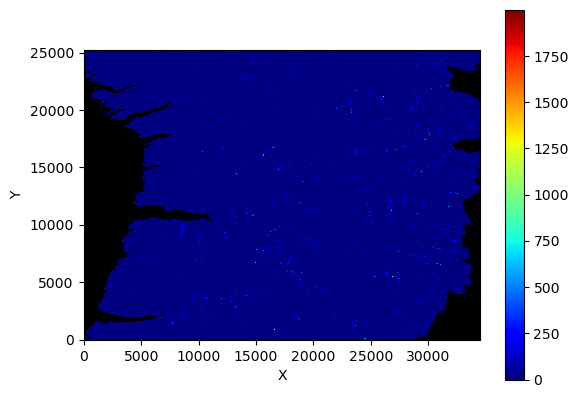

In [7]:
imshow_grid(grid,sf.steepness_indices,cmap="jet")

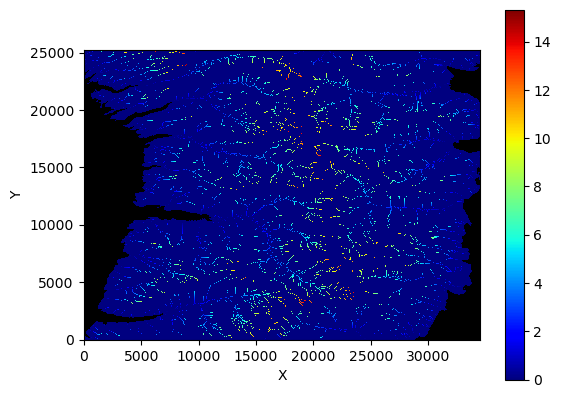

In [8]:
imshow_grid(grid,cf.chi_indices,cmap="jet")

In [9]:
grid.set_closed_boundaries_at_grid_edges(True,True,True,True)

In [10]:
mask = get_watershed_masks(grid)

In [11]:
mask.reshape(grid.shape)

array([[     0,      1,      2, ...,   1149,   1150,   1151],
       [  1152,   2304,   3456, ...,   2301,   2302,   2303],
       [  2304,   3456,   4608, ...,   3453,   3454,   3455],
       ...,
       [966528, 964224, 964224, ..., 965375, 966527, 967679],
       [967680, 968832, 964224, ..., 966527, 967679, 968831],
       [968832, 968833, 968834, ..., 969981, 969982, 969983]])

In [12]:
upstream_node_order = grid.at_node["flow__upstream_node_order"]
flow__receiver_node = grid.at_node["flow__receiver_node"]
watershed_mask = np.arange(grid.size("node"), dtype=int)

for node_id in upstream_node_order:
    watershed_mask[node_id] = watershed_mask[flow__receiver_node[node_id]]

In [13]:
watershed_ids = np.unique(np.sort(watershed_mask))

In [14]:
grid.at_node['idsidsids']=watershed_mask

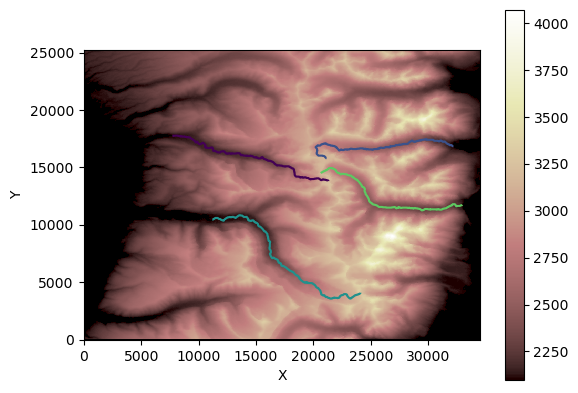

In [18]:
prf = ChannelProfiler(grid, number_of_watersheds = 4, outlet_nodes = [682241, 647345, 401269, 451531])
prf.run_one_step()
prf.plot_profiles_in_map_view()

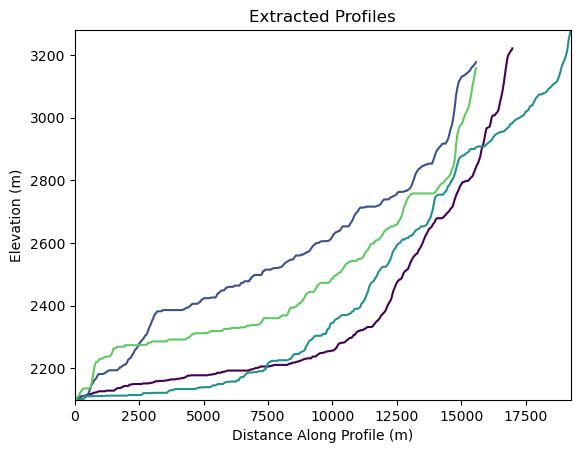

In [28]:
prf.plot_profiles()
plt.ylabel('Elevation (m)')
plt.xlabel('Distance Along Profile (m)');

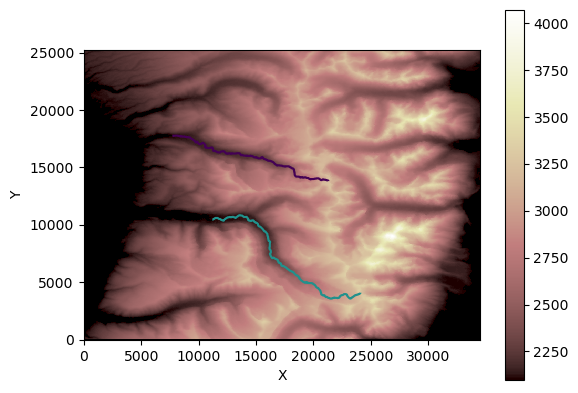

In [33]:
prf_left = ChannelProfiler(grid, number_of_watersheds = 2, outlet_nodes = [682241, 401269])
prf_left.run_one_step()
prf_left.plot_profiles_in_map_view()

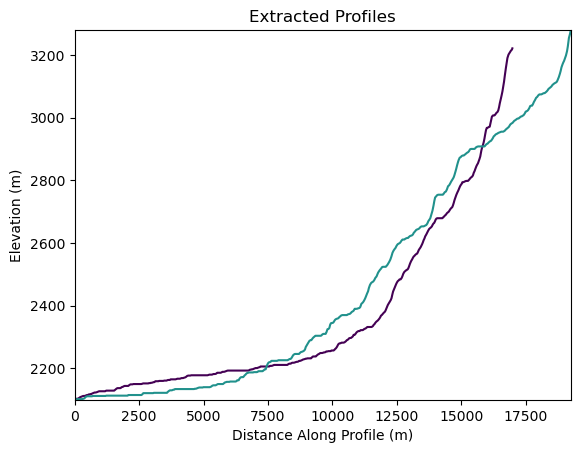

In [89]:
prf_left.plot_profiles()
plt.ylabel('Elevation (m)')
plt.xlabel('Distance Along Profile (m)');

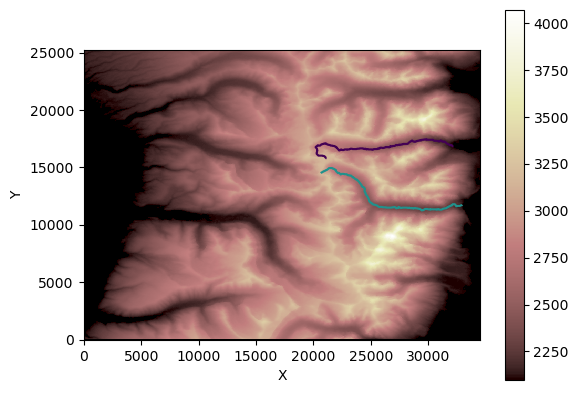

In [34]:
prf_right = ChannelProfiler(grid, number_of_watersheds = 2, outlet_nodes = [647345, 451531])
prf_right.run_one_step()
prf_right.plot_profiles_in_map_view()

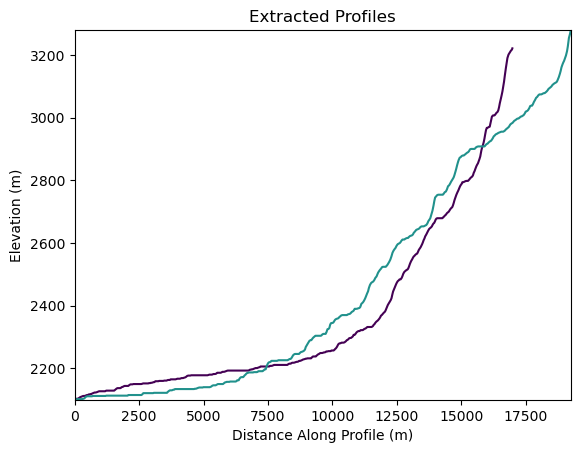

In [90]:
prf_left.plot_profiles()
plt.ylabel('Elevation (m)')
plt.xlabel('Distance Along Profile (m)');